In [2]:
#导入库

import  numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

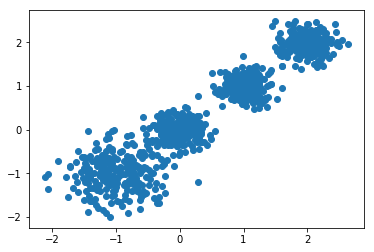

In [3]:
#scikit中的make_blobs方法常被用来生成聚类算法的测试数据，
# 直观地说，make_blobs会根据用户指定的特征数量、中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
#生成数据集
X,y = make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],cluster_std=[0.4,0.2,0.2,0.2],random_state=9)
#第四个，是每个簇中心的标准差，
#生成数据散点图
plt.scatter(X[:,0],X[:,1],marker='o')

3116.1706763322227
2827.388413921534
5921.45496000146
5402.691772756158


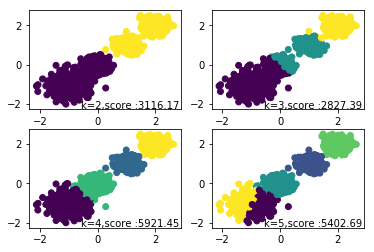

In [4]:
#三 可视化,利用kmeans进行聚类，MiniBatchKmeans 是小batch进行聚类

for index ,k in enumerate((2,3,4,5)):
    plt.subplot(2, 2, index+1)#一个一个的画这个图，
    #尝试使用  k 值进行聚类
    y_pred = MiniBatchKMeans(n_clusters=k,batch_size=200,random_state=9).fit_predict(X)
    score = metrics.calinski_harabaz_score(X,y_pred)
    #CH指标通过计算类中各点与类中心的距离平方和来度量类内的紧密度，
    # 通过计算各类中心点与数据集中心点距离平方和来度量数据集的分离度，
    # CH指标由分离度与紧密度的比值得到。从而，CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果。
    print(score)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(.99,.01,('k=%d,score :%.2f' %(k,score)),
                      transform = plt.gca().transAxes,size=10,
             horizontalalignment="right")
    #axes对象：transData为数据坐标变换对象 transAxes为子图坐标变换对象
plt.show()